In [2]:
"""
Tutorial: Binary Black Hole Mergers in the Galactic Nucleus (GN)
==============================================================================

This script demonstrates the full workflow for analyzing Binary Black Hole mergers
in the Galactic Nucleus (GN), produced by the perturbation of supermassive black hole via triple dynamics.

It covers:
1. Initialize the simulation library (Lazy loading).
2. Sample merger eccentricities (e.g., for LIGO estimation).
3. Analyze the underlying "Progenitor Population" (systems destined to merge).
4. Generate "Snapshots" of the current GN BBH population for LISA analysis.

==============================================================================
"""

import numpy as np



# ==============================================================================
# SECTION 0: Initialization
# ==============================================================================
# The module initializes the manager but DOES NOT load data yet.
# Data is loaded on-demand when functions are called.

print("\n=== STEP 0: Simulation Library Initialization ===")
from GN_modeling import GN_BBH
print("GN_BBH module loaded. Data will be loaded lazily upon request.")


=== STEP 0: Simulation Library Initialization ===
GN_BBH module loaded. Data will be loaded lazily upon request.



=== FEATURE 1: Sampling Merger Eccentricities ===
Sampling 5000 systems based on weighted merger rates...
Sample Mean e (at 10Hz): 5.3191e-05
Example output (first 3): [1.67509944e-06 3.62026418e-05 6.28495482e-06]
Displaying Eccentricity CDF plot...


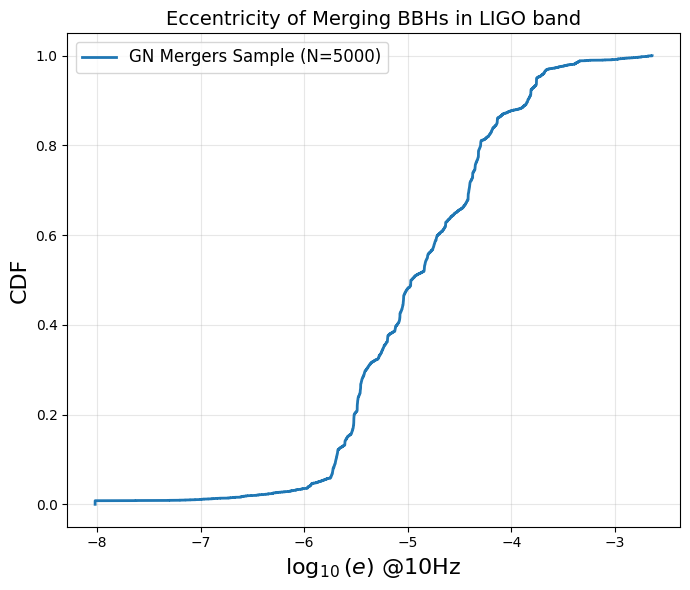

In [3]:
# ==============================================================================
# FEATURE 1: Merger Eccentricity Sampling (LIGO Band)
# ==============================================================================
# Function: Randomly sample N merger eccentricities from the simulated library.
# Represents GN BBH merger eccentricity when entering the LIGO band (10Hz).
print("\n=== FEATURE 1: Sampling Merger Eccentricities ===")
N_samples = 5000
# Call the API to generate samples
e_samples = GN_BBH.generate_random_merger_eccentricities(n=N_samples)
print(f"Sampling {N_samples} systems based on weighted merger rates...")
print(f'Sample Mean e (at 10Hz): {np.mean(e_samples):.4e}')
print('Example output (first 3):', e_samples[:3])

# Plot Cumulative Distribution Function (CDF)
print("Displaying Eccentricity CDF plot...")
GN_BBH.plot_ecc_cdf_log(e_list=e_samples)

In [4]:
# ==============================================================================
# FEATURE 2: Accessing Progenitor Population (Library Analysis)
# ==============================================================================
# Access the underlying simulated progenitor population.
# These are the detailed parameters of systems that successfully merged.
# Format: [m1, m2, a1_initial, e1_initial, i_initial, a2, a1_final, e1_final, t_final(lifetime)]

print("\n=== FEATURE 2: Analyzing Underlying Merger Progenitors ===")
N_inspect = 3
progenitors = GN_BBH.get_random_merger_systems(n=N_inspect)

for i, sys in enumerate(progenitors):
    # sys is now a list, not a dict.
    # [0:m1, 1:m2, 2:ai, 3:ei, 4:ii, 5:a2, 6:afin, 7:efin]
    print(f" [System {i+1}]")
    print(f"    - Masses: {sys[0]} + {sys[1]} M_sun")
    print(f"    - Initial Orbit: a1 = {sys[2]} au, e1 = {sys[3]}, a2 (around the SMBH) = {sys[5]} au")
    print(f"    - Initial Mutual Inclination: {sys[4]:.4f} deg")
    print(f"    - Final State: a1_f = {sys[6]} AU, e1_f = {sys[7]}, lifetime = {sys[8]} yr",)


=== FEATURE 2: Analyzing Underlying Merger Progenitors ===
 [System 1]
    - Masses: 84.94640000000001 + 87.14997 M_sun
    - Initial Orbit: a1 = 0.2274982 au, e1 = 0.9736481, a2 (around the SMBH) = 16547.04 au
    - Initial Mutual Inclination: 14.7961 deg
    - Final State: a1_f = 1.905019343291908e-05 AU, e1_f = 4.4586698451361644e-05, lifetime = 21585.57880455915 yr
 [System 2]
    - Masses: 61.46134 + 36.777570000000004 M_sun
    - Initial Orbit: a1 = 3.113053 au, e1 = 0.9697392000000001, a2 (around the SMBH) = 4759.721 au
    - Initial Mutual Inclination: 99.7400 deg
    - Final State: a1_f = 1.580289531701963e-05 AU, e1_f = 2.3282994920497677e-05, lifetime = 1876917.5342026288 yr
 [System 3]
    - Masses: 8.560591 + 67.03537 M_sun
    - Initial Orbit: a1 = 0.1156823 au, e1 = 0.8091715000000002, a2 (around the SMBH) = 2564.641 au
    - Initial Mutual Inclination: 70.7438 deg
    - Final State: a1_f = 1.4481326729467215e-05 AU, e1_f = 3.3167955364935026e-06, lifetime = 33449209.16


=== Snapshot Generation (LISA Band / Current Milky Way Center) ===
Generating snapshot for Steady State Population with Replenishing Rate = 3.0/Myr...
Generating snapshot for Young Nuclear Star Cluster: Age = 6.0 Myr, N_BBH = 400...
Altogether 3083 systems survived.
Example output: [['GN_Steadystate', 8.0, np.float64(0.45365140000000004), np.float64(0.7409071), 59.64804, 13.980490000000001, np.float64(0.0054711536805524055)]]


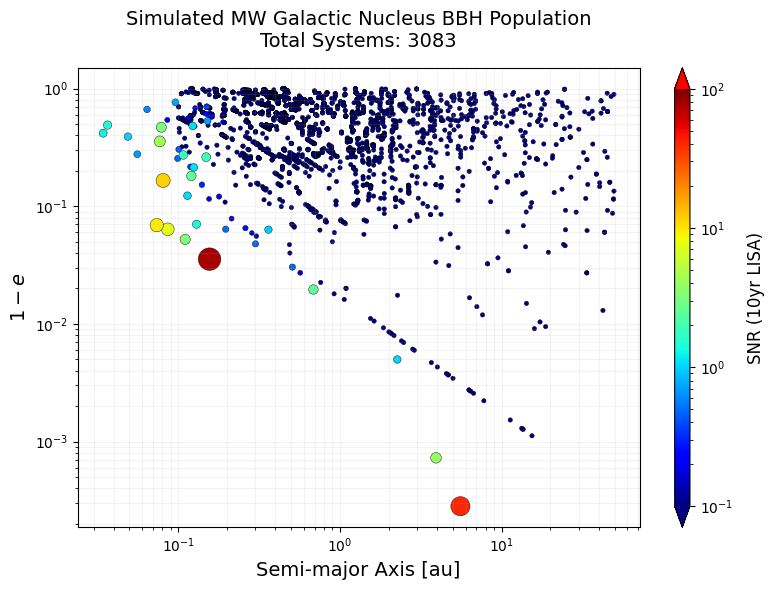

In [6]:
# ==============================================================================
# FEATURE 3: Snapshot Generation (LISA Band / Current State)
# ==============================================================================
# Generate a "snapshot" containing BBH systems that currently exist in the GN.
# These systems are evolving under the SMBH potential and may be visible to LISA.
# The internal logic generates a structured list: mwGNsnapshot.
"""
# There are two resources of BBHs in GN, one is Steady State Old Population (Relaxed Population)
# another is the observationally confirmed Young Nuclear Star Cluster (YNC) Population.
# The function is designed to simulate them both, with the parameter to change their properties.

Output Data Format:
Each system in the returned list has the following columns:
[0] Label (str)      : 'GN_Steadystate' or 'GN_YNC'
[1] Distance (float) : Distance from Sun [kpc]
[2] SMA (float)      : Current Semi-major Axis [au]
[3] Eccentricity     : Current Eccentricity (0 <= e < 1)
[4] Mass 1 (float)   : Mass of primary BH [M_sun]
[5] Mass 2 (float)   : Mass of secondary BH [M_sun]
[6] SNR (float)      : Signal-to-Noise Ratio (default 10yr LISA observation)
"""

print("\n=== Snapshot Generation (LISA Band / Current Milky Way Center) ===")
# --- 3.1: Steady State GN (Relaxed Population) ---
# Simulates the background population assuming a constant formation rate.
rate_gn = 3.0  # Formation rate: 3 systems per Myr
print(f"Generating snapshot for Steady State Population with Replenishing Rate = {rate_gn}/Myr...")

# --- 3.2: Young Nuclear Cluster (YNC) Event ---
# Simulates a specific "Starburst" event that happened T years ago.
age_ync = 6.0e6   # The cluster is 6 Myr old (6e6 years)
N_ync_sys = 400   # 400 massive BBHs formed in this cluster
print(f"Generating snapshot for Young Nuclear Star Cluster: Age = {age_ync/1e6} Myr, N_BBH = {N_ync_sys}...")

# Mixed Population (Realistic MW Center):
snapshot_data = GN_BBH.generate_snapshot_population(Gamma_rep=rate_gn, ync_age=age_ync, ync_count=N_ync_sys)
print(f"Altogether {len(snapshot_data)} systems survived.")
print(f"Example output: {snapshot_data[:1]}")
GN_BBH.plot_snapshot_population(snapshot_data, title=f"Simulated MW Galactic Nucleus BBH Population")